In [20]:
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lars
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.svm import SVR
from sklearn.svm import NuSVR
from sklearn.svm import LinearSVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.isotonic import IsotonicRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import log_loss
import plotly.io as pio

In [1]:
## import scaled derivation cohort

In [14]:
import pandas as pd
pd.set_option("display.max_columns", None)
dataset = pd.read_csv("/Users/erikmichels/Desktop/PhD/Lymfo/dataframe.csv", sep = ",", decimal=".")                                   
dataset.head()

,Unnamed: 0,Tie_2,E_selectin,Thrombomodulin,VCAM_1,Syndecan_1,PAI_1,CD_31,RAGE,TNF_alpha,Tenascin_C,SP_D,TNF_RI,CD40L,Granzyme_B,PD_L1,IFNg,IL1RA,IL_1alpha,IL_1beta,IL2,IL4,IL6,IL7,IL10,IL12,IL13,IL15,IL17a,IL33,CCL3,CCL2,CCL4,CXCL8,CCL5,CXCL10,Cluster
0,35925,1.339161,0.433574,-0.175778,0.475840,-0.334483,-0.041856,0.090635,0.391241,-0.794745,0.960711,-1.466011,-0.462530,-0.972146,-1.842308,0.188380,-1.445001,-0.441824,0.788990,0.095500,0.228301,0.496582,-0.009042,0.204574,0.200789,0.254457,0.676257,0.358483,0.698058,0.593657,-0.678960,-0.246297,0.233279,0.297069,0.757200,0.002421,1
1,197325,-0.074949,-0.587430,0.473249,-0.056366,-0.399932,0.023877,0.555937,0.140157,0.450693,-1.036433,0.635301,-0.162576,-2.101858,-0.973700,-0.569607,-0.074390,-0.421058,-0.304443,-0.544001,-0.637251,-0.067657,2.537599,0.251530,0.800802,-0.499405,-0.622294,-0.454351,-0.511075,-0.869665,0.618804,1.359017,-0.624103,0.841880,-0.839930,0.016748,1
2,467102,0.283346,-0.653802,-0.410693,-1.082741,0.658721,1.031185,0.028756,-0.861485,0.550972,-0.534472,1.297214,-0.305444,1.279503,0.424081,-0.502963,-0.227725,-1.369803,0.602104,0.847757,1.197491,0.916615,-0.203518,0.410530,-1.385620,0.831474,0.758829,0.145023,0.675779,0.616848,0.180959,-1.208934,0.814398,-0.958581,0.928781,-1.517783,2
3,468691,2.901641,1.242547,-0.506913,0.633648,-0.473881,-0.468697,-0.694863,0.955459,-0.469126,-0.241794,-0.807001,0.660058,-0.380235,-1.158038,0.423674,1.429752,1.567279,-0.561836,-0.190991,-0.133538,-0.072744,0.459506,-0.550214,0.013296,-1.088822,-0.167301,-0.340876,-0.317105,0.038575,-1.440309,-0.192319,-0.515158,-0.040966,-0.158977,1.166233,1
4,1083471,-1.914636,-0.291949,0.779606,0.325827,-0.002854,0.089269,-1.149086,-0.255519,0.371244,2.532023,0.511940,1.237694,-0.741711,-2.032666,-3.069350,-1.187363,0.560270,-1.161501,-0.740768,-0.026493,-1.126356,-0.432540,0.365270,1.538901,0.752735,-0.918277,0.678470,-1.720409,-0.875515,-0.346777,-0.656157,0.312116,-1.116983,-0.743350,1.000460,1


In [15]:
dataset.describe()
dataset.drop('Unnamed: 0', axis = 1, inplace = True)

## Grab top performing biomarkers of 35-biomarker model

In [16]:
import numpy as np
X_train = dataset[["Syndecan_1", "IL2", "IL10", "IL_1alpha", "CXCL10", "IL_1beta","PAI_1", "CCL5", "CD40L", "IL1RA"]]
y_train = dataset.loc[:, dataset.columns == "Cluster"].values.ravel()

y_train = pd.Series(y_train)

In [ ]:
## New hypertuning and cross validation

In [21]:
# in brackets all the tried parameters
params = {'learning_rate':[0.01, 0.05, 0.1], 
          'gamma':[1.25, 1.5, 1.75, 2], 
          'min_child_weight': [0.5, 0.75, 1, 5, 10], 
          'max_depth':[3, 5, 7], 
          'subsample':[0.1, 0.5, 1.0], 
          'colsample_bytree': [0.2, 0.4, 0.6, 0.8, 1.0], 
          'colsample_bylevel': [0.4, 0.6, 0.8, 1.0], 
          'num_class': [3]
}

In [ ]:
## cv = GridSearchCV(model, params, cv=5, scoring="accuracy", n_jobs=-1)

In [ ]:
#%time cv.fit(X_train, y_train)
#model = cv.best_estimator_
#print(cv.best_params_)

In [ ]:
# {'colsample_bylevel': 0.4, 'colsample_bytree': 0.4, 'gamma': 1, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 0.5, 'num_class': 3, 'subsample': 1.0}

## Select best model

In [22]:
## top 10 cross-validated
model = XGBClassifier(learning_rate = 0.05,
          gamma = 1,
          min_child_weight = 0.1,
          max_depth = 7, 
          subsample = 0.8, 
          colsample_bytree = 0.6, 
          colsample_bylevel = 0.5, 
          objective='multi:softprob')
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=0.5, colsample_bynode=1, colsample_bytree=0.6,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=1, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=7, max_leaves=0, min_child_weight=0.1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto', ...)

In [23]:
y_pred = model.predict(X_train)

In [24]:
accuracy = accuracy_score(y_train, y_pred)
accuracy

0.9852941176470589

In [ ]:
# get confidence interval with bootstrapping

In [25]:
import numpy as np
from sklearn.metrics import accuracy_score

# Number of bootstrap iterations
num_iterations = 1000

# Create an array to store accuracy values from each iteration
bootstrap_accuracies = []

# Perform bootstrapping
for _ in range(num_iterations):
    # Resample with replacement
    indices = np.random.choice(len(y_train), len(y_train), replace=True)
    y_train_resampled = y_train[indices]
    y_pred_resampled = y_pred[indices]

    # Calculate accuracy for the resampled data
    accuracy = accuracy_score(y_train_resampled, y_pred_resampled)
    bootstrap_accuracies.append(accuracy)

# Calculate the mean and standard error of the bootstrapped accuracies
mean_accuracy = np.mean(bootstrap_accuracies)
std_error = np.std(bootstrap_accuracies, ddof=1) / np.sqrt(num_iterations)

# Calculate confidence intervals (e.g., 95% confidence interval)
confidence_level = 0.95
alpha = 1 - confidence_level
lower_bound = mean_accuracy - (std_error * np.percentile(np.array(bootstrap_accuracies), alpha / 2))
upper_bound = mean_accuracy + (std_error * np.percentile(np.array(bootstrap_accuracies), 1 - alpha / 2))

print("Mean Accuracy:", mean_accuracy)
print(f"{confidence_level*100}% Confidence Interval: ({lower_bound}, {upper_bound})")


Mean Accuracy: 0.9852352941176471
95.0% Confidence Interval: (0.9850144854269497, 0.9854577948289629)


In [26]:
import shap

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


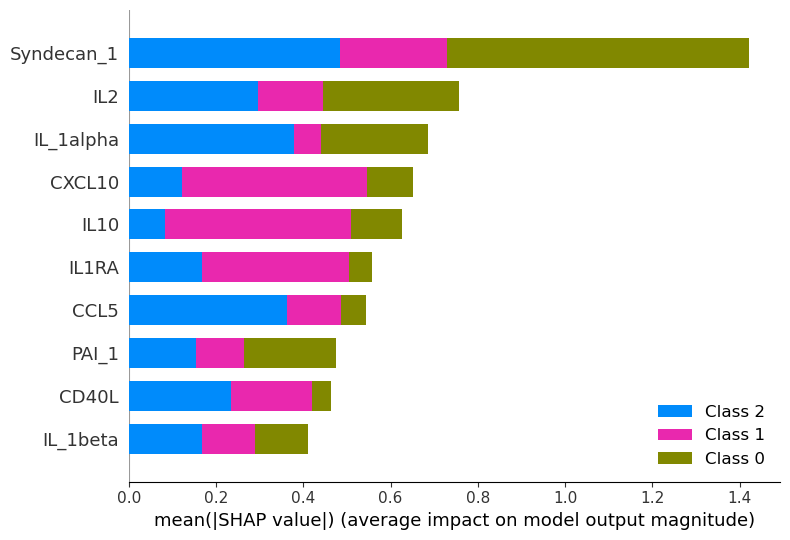

In [27]:
# calculate shap values for each sample
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_train, approximate = True)
shap.summary_plot(shap_values, X_train, plot_type="bar")

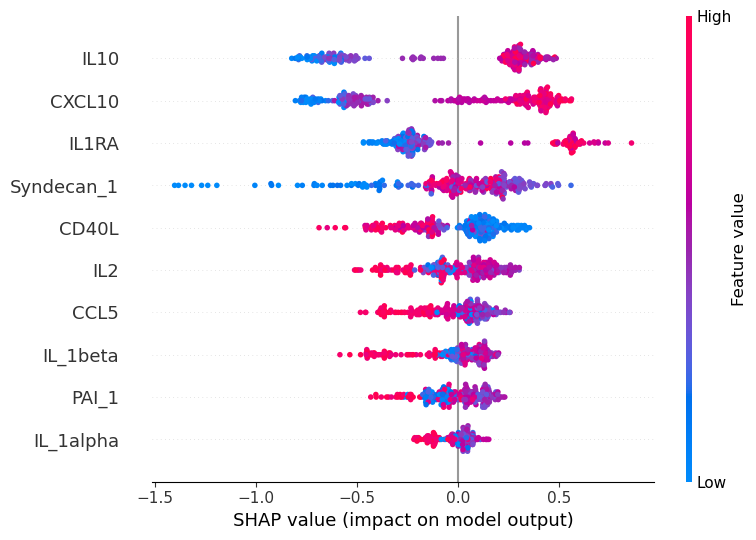

In [28]:
## Class 1
fig = shap.summary_plot(shap_values[1], X_train)
plt.show()

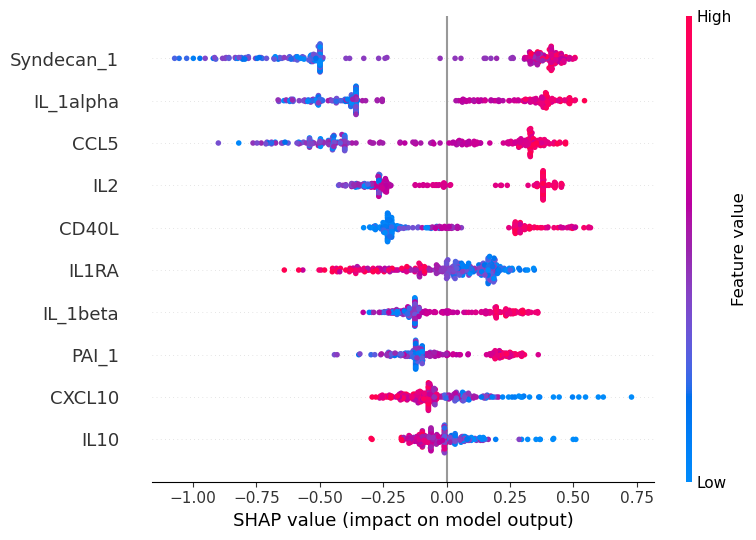

In [29]:
## Class 2
fig = shap.summary_plot(shap_values[2], X_train)
plt.show()

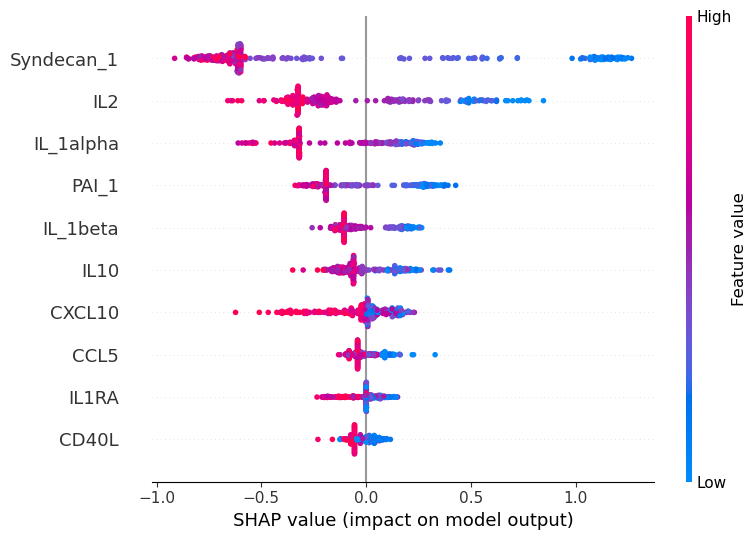

In [30]:
## Class 3
fig = shap.summary_plot(shap_values[0], X_train)
plt.show()

## PREDICT IN EXTERNAL VALIDATION COHORT

In [ ]:
## import scaled validation cohort

In [31]:
import pandas as pd
pd.set_option("display.max_columns", None)
dataset_val = pd.read_csv("/Users/erikmichels/Desktop/PhD/Lymfo/validation.csv", sep = ",", decimal=".")                                   
dataset_val.head()

,Unnamed: 0,Tie_2,E_selectin,Thrombomodulin,VCAM_1,Syndecan_1,PAI_1,CD_31,RAGE,TNF_alpha,Tenascin_C,SP_D,TNF_RI,CD40L,Granzyme_B,PD_L1,IFNg,IL1RA,IL_1alpha,IL_1beta,IL2,IL4,IL6,IL7,IL10,IL12,IL13,IL15,IL17a,IL33,CCL3,CCL2,CCL4,CXCL8,CCL5,CXCL10
0,1,-1.691040,-1.131010,-1.280763,-2.702399,-1.115518,-0.316620,-0.687252,-2.057874,-0.017878,-0.735958,0.472961,-1.431495,0.893988,-0.065323,-1.194013,-0.266693,0.264760,-0.018607,-1.100361,-2.807442,0.489570,-3.023424,0.225916,0.178042,0.258511,-1.102627,-0.566368,-0.271110,-1.901338,-0.237967,1.867251,1.089532,-2.002516,0.025105,0.153649
1,102,-0.881216,-0.780967,0.193814,-0.670023,-0.983872,-0.673372,0.597810,-0.378808,-0.032007,-0.761373,-1.862617,-0.578533,0.499841,-0.383642,-0.276031,-0.539772,-0.270736,0.176108,-1.907289,-1.233114,0.469174,-0.897453,-0.411895,-0.841561,-0.189992,-0.405207,0.509580,-0.711384,-0.614223,-0.890462,0.019832,-0.812811,-0.430200,0.541440,0.361543
2,108,1.588916,-0.057885,1.781876,2.471278,0.932117,0.439459,0.507855,1.111445,1.013150,-0.508826,0.605318,1.332579,-1.291415,0.478651,1.180780,0.603261,0.891404,-0.349500,-0.074967,-0.746917,-1.097409,-0.362511,-0.343286,0.016953,0.858526,0.817001,0.268918,-0.630044,0.847130,1.207719,1.253459,0.268993,1.620880,-1.736747,1.032698
3,114,2.359209,-0.254193,0.705946,0.296627,-0.844016,0.433477,1.615150,-1.378993,-0.091110,1.353316,2.097603,0.503098,1.272831,-1.340217,-0.156599,-0.892166,-1.243189,0.260561,1.096354,0.064544,0.322980,-1.148525,0.320254,-0.210163,0.194368,4.000206,-0.378988,0.126907,1.409781,0.427307,-0.903662,1.326344,-0.857787,1.349839,-1.822827
4,117,0.545294,0.447808,-0.385756,-0.916015,-0.709728,-0.312133,0.068793,-0.814972,-1.471386,-1.375561,-2.463607,-1.193851,0.478146,1.258397,-1.031240,0.255938,-0.665917,0.291637,0.826075,0.083094,0.753075,-0.664640,-0.067896,-0.494097,0.028680,-0.064718,-0.167641,-0.584780,0.342756,-0.995145,0.704972,-0.306104,-1.202421,0.123330,-0.274799


In [32]:
dataset_val.describe()
dataset_val.drop('Unnamed: 0', axis = 1, inplace = True)

In [33]:
dataset_val = dataset_val[["Syndecan_1", "IL2", "IL10", "IL_1alpha", "CXCL10", "IL_1beta","PAI_1", "CCL5", "CD40L", "IL1RA"]]

In [34]:
y_val = model.predict(dataset_val)

In [35]:
y_val

array([0, 0, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 0, 1,
       2, 1, 0, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0, 2, 2, 0, 1, 0, 2, 1,
       2, 0, 1, 2, 1, 0, 0, 1, 0, 0, 1, 1, 1, 2, 1, 1, 2, 0, 1, 2, 1, 1,
       1, 1, 1, 2, 1, 1, 0, 2, 0, 2, 2, 1, 2, 0, 1, 2, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1])

## PREDICT IN ICU LYMPHO

In [ ]:
## Import scaled ICU biomarker data

In [36]:
import pandas as pd
pd.set_option("display.max_columns", None)
ICU_lymfo_val = pd.read_csv("/Users/erikmichels/Desktop/PhD/Lymfo/lymfo_ICU_ward_scale.csv", sep = ",", decimal=".")                                   
ICU_lymfo_val.head()

,Unnamed: 0,ang_ratio,Tie_2,E_selectin,Thrombomodulin,VCAM_1,Syndecan_1,D_dimer,PAI_1,CD_31,RAGE,Ferritin,TNF_alpha,TREM_1,Tenascin_C,SP_D,GM_CSF,TNF_RI,CD40L,Granzyme_B,PD_L1,IFNa,IFNg,IL1RA,IL_1alpha,IL_1beta,IL2,IL4,IL6,IL7,IL10,IL12,IL13,IL15,IL17a,IL33,CCL3,CCL2,CCL4,CXCL8,CCL5,CXCL10
0,1774975,2.827095,0.135628,-1.794496,2.456388,3.051318,2.044282,-0.087630,-0.312590,-0.631625,3.395567,-0.556783,-0.938414,1.236405,1.469627,1.685625,0.614393,2.321960,-0.735907,-0.973700,1.225588,0.927223,-0.074390,0.271851,-1.851910,-0.544001,-1.611392,-1.118654,0.652228,0.086451,0.385719,-2.107863,-3.679789,0.672554,-3.267478,-0.434813,-0.336673,0.711529,-1.970150,-0.142590,-3.311857,1.391993
1,198209,0.115986,0.777744,0.686181,0.912664,-1.978219,0.389321,0.317869,0.576668,0.474381,0.953686,0.888052,1.721846,-0.416924,0.205936,0.358785,1.060318,0.841189,-0.592479,-0.676067,1.047202,-0.155703,0.085970,0.747344,-0.942760,-0.628373,-0.202172,-0.782454,0.875688,0.549356,1.259466,0.165235,0.122461,0.164982,-0.220129,-0.725124,-0.086993,0.985060,0.085863,-0.310729,0.301174,1.716340
2,1990229,0.135234,-0.347927,0.667513,0.976612,-0.213383,0.577972,-0.520571,1.150734,-0.928344,1.914286,0.852802,0.143369,2.443122,1.095058,2.425053,0.188542,1.439155,-1.610740,-0.468311,0.527588,0.727355,1.429752,1.816354,-2.246079,-6.553561,-4.788100,-0.646717,5.126862,-0.535237,0.561561,-2.063298,-2.919024,-1.023949,-3.895522,-0.499435,-0.891757,0.561281,-1.733183,1.258626,0.344992,2.110812
3,1994990,-0.401937,0.540597,0.401889,0.767980,0.374130,0.265724,-0.334169,0.397840,0.222356,2.076949,0.579172,-1.584051,0.160810,0.244223,0.200152,0.514887,0.342039,0.884580,1.072238,0.550456,-0.355003,0.390349,0.398631,-1.395481,-1.746353,-1.389735,-2.984251,2.412531,0.378558,-0.058710,0.232219,-0.996607,-0.516804,-1.428820,-0.388986,-0.314186,-0.419800,-0.847737,-0.398874,0.175248,1.167342
4,2216233,0.576748,-0.142912,-0.967906,-0.361381,0.739505,-1.914651,-0.496192,-1.526090,-4.538955,0.810244,0.695344,-0.763800,-0.810427,-0.261885,-1.121412,0.389287,-0.775469,-0.667044,-0.900445,-0.718735,-1.323127,-1.103881,-0.551756,-2.047104,-2.869167,-2.541203,-1.027281,-1.691335,-2.596684,0.212542,0.019570,-1.936257,-0.798042,-1.150441,2.246397,-0.216797,-0.130894,-2.849344,0.770640,-4.276807,0.042213


In [37]:
ICU_lymfo_val.describe()
ICU_lymfo_val.drop('Unnamed: 0', axis = 1, inplace = True)

In [38]:
ICU_lymfo_val = ICU_lymfo_val[["Syndecan_1", "IL2", "IL10", "IL_1alpha", "CXCL10", "IL_1beta","PAI_1", "CCL5", "CD40L", "IL1RA"]]

In [39]:
y_ICU_lymfo_val = model.predict(ICU_lymfo_val)

In [40]:
y_ICU_lymfo_val

array([1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 2, 1])